In [ ]:
!pip install opencv-python-headless matplotlib

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# STEP 1: Helper function to display images

def show_images(titles, images):
    """
    Displays multiple images with their titles in one row.

    Parameters:
    - titles (list): Titles for each image.
    - images (list): List of image arrays (loaded or processed).
    """
    plt.figure(figsize=(15, 5))  # Set figure size (width, height) in inches.
    for i, (title, img) in enumerate(zip(titles, images)):
        plt.subplot(1, len(images), i + 1)  # Create subplots: 1 row, `len(images)` columns
        plt.title(title)  # Add a title to each subplot
        plt.axis('off')  # Hide axis for cleaner visualization
        if len(img.shape) == 3:  # If it's a color image (3 channels)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        else:
            plt.imshow(img, cmap='gray')  # Use grayscale colormap for single-channel images
    plt.tight_layout()  # Adjust subplot spacing
    plt.show()  # Display all the images


In [ ]:
# STEP 2: Upload and Read image

from google.colab import files

print("Please upload an image file.")
uploaded = files.upload()  # Prompts the user to upload a file in Colab

# Get the filename of the uploaded image
image_path = next(iter(uploaded))

# Read the image with OpenCV
image = cv2.imread(image_path)  # Reads the image in BGR format


Please upload an image file.


KeyboardInterrupt: 

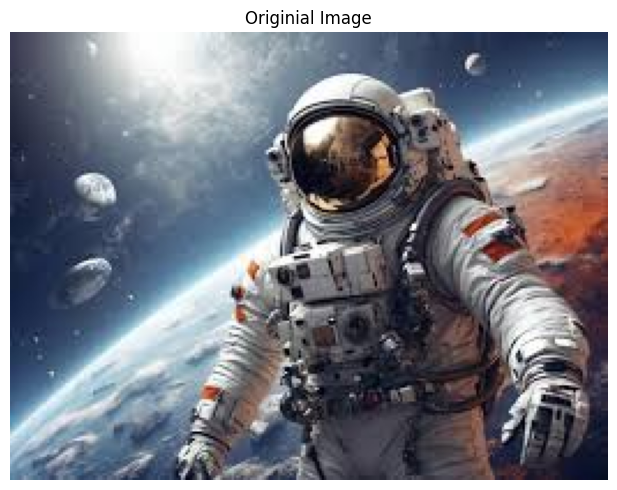

In [ ]:
# STEP 3: Display the original image

if image is not None:
  show_images(["Originial Image"], [image])
else:
  print("Seems to have an error in displaying the image")

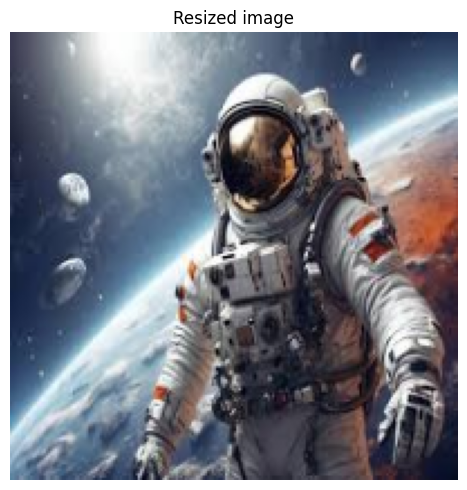

In [ ]:
# STEP 4: Resize the image

resized_image = cv2.resize(image,(200,200))
show_images(["Resized image"],[resized_image])

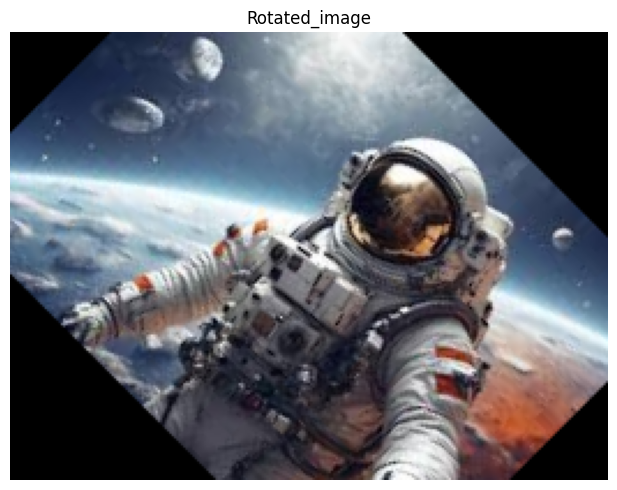

In [ ]:
# STEP 5: Rotate the image
(h,w) = image.shape[:2]
center = (w//2, h//2)

rotation_matrix = cv2.getRotationMatrix2D(center, angle=-45, scale=1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w,h))

show_images(["Rotated_image"], [rotated_image])

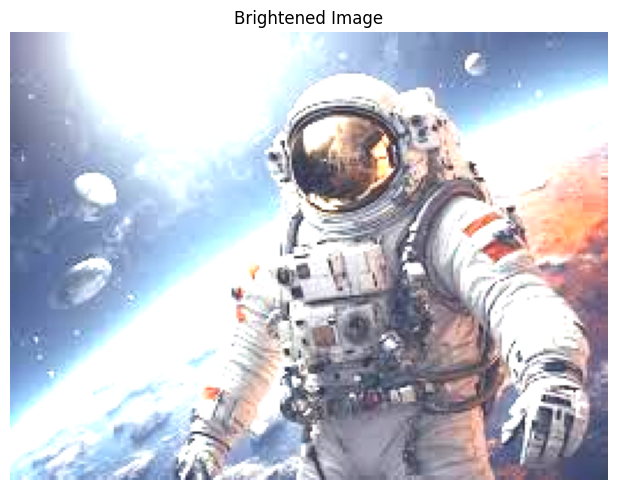

In [ ]:
brightness_image = cv2.convertScaleAbs(image, alpha=1.5, beta=50)
show_images(["Brightened Image"], [brightness_image])

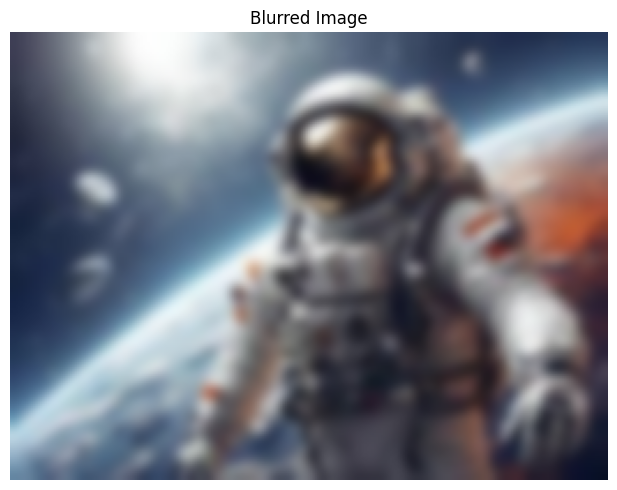

In [ ]:
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)
show_images(["Blurred Image"], [blurred_image])


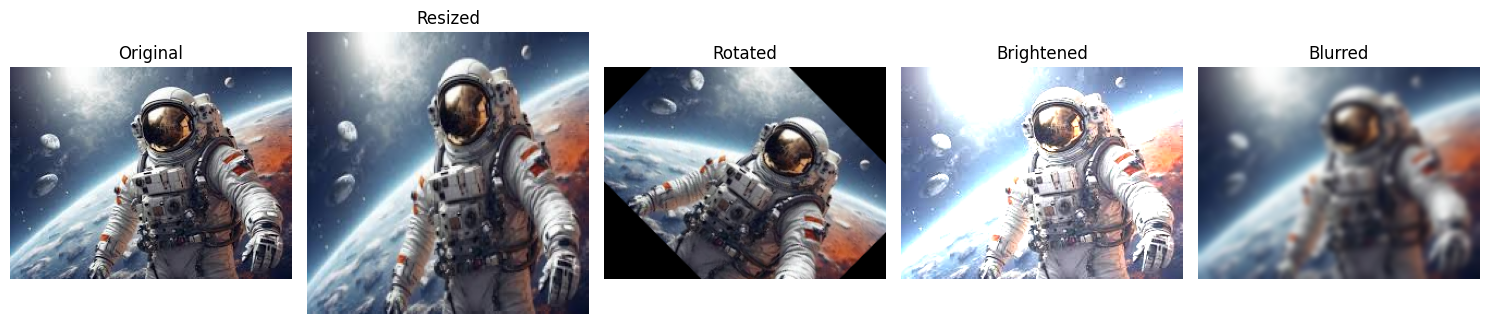

In [ ]:
titles = ["Original", "Resized", "Rotated", "Brightened", "Blurred"]
images = [image, resized_image, rotated_image, brightness_image, blurred_image]
show_images(titles, images)
